# TMDb Movies' Revenue Prediction using Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, copy

%matplotlib inline

## Data

In [2]:
df = pd.read_csv('tmdb-movies.csv')[['revenue','vote_average']]

In [3]:
df=df[df['revenue'] != 0]

In [4]:
df.describe()

,revenue,vote_average
count,4.850000e+03,4850.000000
mean,8.922066e+07,6.148763
std,1.620684e+08,0.798795
min,2.000000e+00,2.100000
25%,7.708081e+06,5.600000
50%,3.182654e+07,6.200000
75%,9.991823e+07,6.700000
max,2.781506e+09,8.400000


In [5]:
x = df['vote_average'].to_numpy()
y = df['revenue'].to_numpy()

In [6]:
print("Input:", x, "\nPredict:", y)

Input: [6.5 7.1 6.3 ... 6.9 7.  6.7] 
Predict: [1513528810  378436354  295238201 ...    6000000   20000000   12000000]


## Training

### Compute Cost

In [7]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

### Compute Gradient

In [8]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

### Gradient Descent

In [9]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [10]:
w_in = b_in = 0
alpha = 0.005
num_iters = 10000
w_final, b_final, J_hist, p_hist = gradient_descent(x, y ,w_in , b_in, alpha, num_iters, compute_cost, compute_gradient)

Iteration    0: Cost 1.56e+16  dj_dw: -5.754e+08, dj_db: -8.922e+07   w:  2.877e+06, b: 4.46103e+05
Iteration 1000: Cost 1.28e+16  dj_dw: -4.090e+05, dj_db:  2.556e+06   w:  1.671e+07, b:-1.09921e+07
Iteration 2000: Cost 1.27e+16  dj_dw: -3.772e+05, dj_db:  2.357e+06   w:  1.868e+07, b:-2.32691e+07
Iteration 3000: Cost 1.27e+16  dj_dw: -3.479e+05, dj_db:  2.174e+06   w:  2.049e+07, b:-3.45919e+07
Iteration 4000: Cost 1.27e+16  dj_dw: -3.209e+05, dj_db:  2.005e+06   w:  2.216e+07, b:-4.50347e+07
Iteration 5000: Cost 1.27e+16  dj_dw: -2.959e+05, dj_db:  1.849e+06   w:  2.370e+07, b:-5.46660e+07
Iteration 6000: Cost 1.27e+16  dj_dw: -2.729e+05, dj_db:  1.706e+06   w:  2.512e+07, b:-6.35488e+07
Iteration 7000: Cost 1.26e+16  dj_dw: -2.517e+05, dj_db:  1.573e+06   w:  2.643e+07, b:-7.17413e+07
Iteration 8000: Cost 1.26e+16  dj_dw: -2.322e+05, dj_db:  1.451e+06   w:  2.764e+07, b:-7.92971e+07
Iteration 9000: Cost 1.26e+16  dj_dw: -2.141e+05, dj_db:  1.338e+06   w:  2.876e+07, b:-8.62657e+07


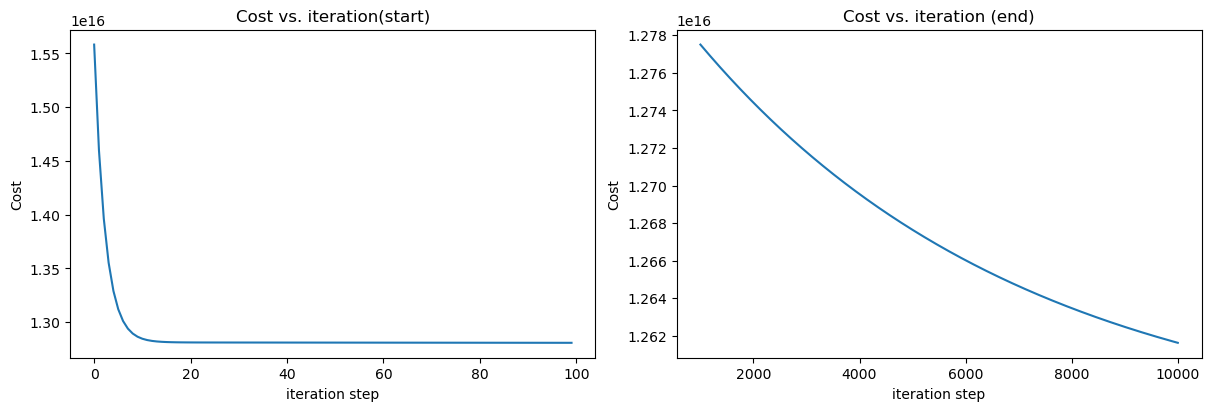

In [11]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [12]:
print(f"Movie with a vote average of 4.2 is predicted to make {w_final*4.2 + b_final:,} dollars")
print(f"Movie with a vote average of 6.1 is predicted to make {w_final*6.1 + b_final:,} dollars")
print(f"Movie with a vote average of 8.7 is predicted to make {w_final*8.7 + b_final:,} dollars")


Movie with a vote average of 4.2 is predicted to make 32,410,764.094230354 dollars
Movie with a vote average of 6.1 is predicted to make 89,002,415.71173666 dollars
Movie with a vote average of 8.7 is predicted to make 166,443,623.18832427 dollars
